 # MVTec Dataset の Hazelnut データセットの確認

 ## Preset

In [1]:
# default packages
import logging
import os
import pathlib
import typing as t


In [2]:
# third party packages
import IPython
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL.Image as Image



In [3]:
# my packages
import src.data.dataset as dataset
import src.data.directories as directories



In [4]:
IPython.get_ipython().run_line_magic("load_ext", "autoreload")
IPython.get_ipython().run_line_magic("autoreload", "2")



In [5]:
# logger
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)



In [6]:
def cd_project_root_() -> None:
    """ルートディレクトリをプロジェクトルートに移動."""
    current = pathlib.Path().resolve()
    if current.stem == "notebooks":
        os.chdir(current.parent)

    current = pathlib.Path().resolve()
    logger.info(f"current path: {current}")


cd_project_root_()



INFO:__main__:current path: /content/torch_anomaly_detection


 ## データ数などの統計情報

In [7]:
def download_dataset_() -> pathlib.Path:
    """データセットをダウンロード."""
    raw_dir = directories.get_raw()
    config = dataset.Config(dataset_name="MVTec_Hazelnut", download_dir=raw_dir)
    filepath = dataset.download(config)

    return filepath


RAW_DIR = download_dataset_()
TRAIN_DIR = RAW_DIR.joinpath("train")
TEST_DIR = RAW_DIR.joinpath("test")
GROUND_TRUTH_DIR = RAW_DIR.joinpath("ground_truth")



INFO:src.data.dataset:file already exists: /content/data/raw/hazelnut.tar.xz


In [8]:
def calc_group_and_num(dirpath: pathlib.Path) -> t.List[t.Dict]:
    """与えられたディレクトリ下のグループとグループ内の画像枚数を返す."""
    groups = [q.resolve() for q in dirpath.glob("*")]
    records = [
        {"dir": dirpath.stem, "group": g.stem, "num": len(list(g.glob("**/*.png")))}
        for g in groups
    ]

    return records


def show_number_of_images() -> None:
    """学習、テストなどのグループと各画像枚数を表示."""
    df = pd.DataFrame(
        [
            *calc_group_and_num(TRAIN_DIR),
            *calc_group_and_num(TEST_DIR),
            *calc_group_and_num(GROUND_TRUTH_DIR),
        ]
    )

    display.display(df)


show_number_of_images()


,dir,group,num
0,train,good,391
1,test,good,40
2,test,cut,17
3,test,hole,18
4,test,print,17
5,test,crack,18
6,ground_truth,cut,17
7,ground_truth,hole,18
8,ground_truth,print,17
9,ground_truth,crack,18


 ## 画像の一部を表示

In [9]:
def show_images(dirpath: pathlib.Path, num: int) -> None:
    filelist = sorted(list(dirpath.glob("**/*.png")))

    rows, cols = 1, num
    _, axes = plt.subplots(rows, cols, figsize=(4 * num, 4))
    for filepath, idx in zip(filelist, range(num)):
        img = np.array(Image.open(filepath))

        ax = axes[idx]
        ax.imshow(img)
        ax.set_title(filepath.stem)

    plt.show()
    plt.cla()
    plt.clf()
    plt.close()



INFO:__main__:train data...


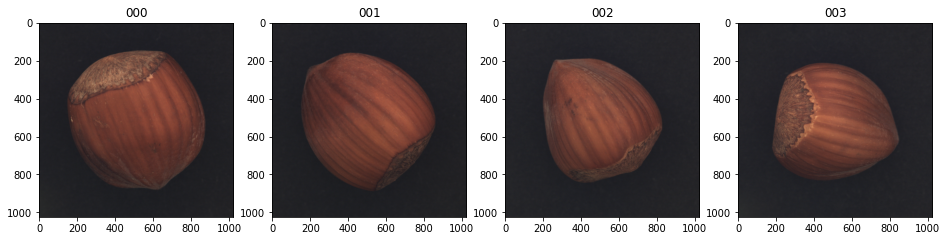

INFO:__main__:test good data...


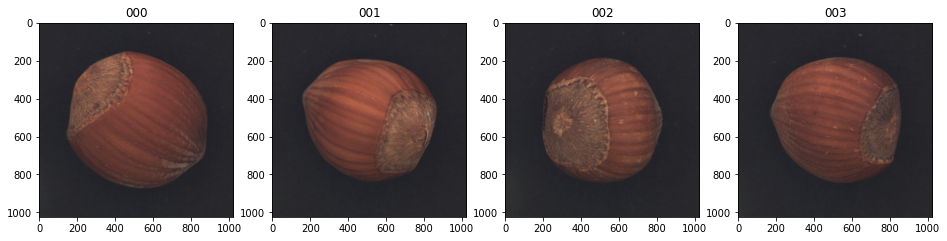

INFO:__main__:test cut data...


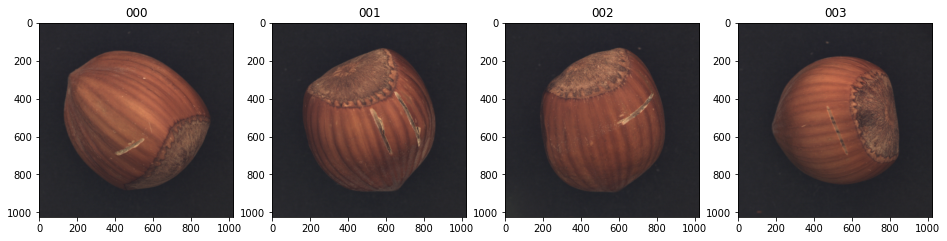

INFO:__main__:test hole data...


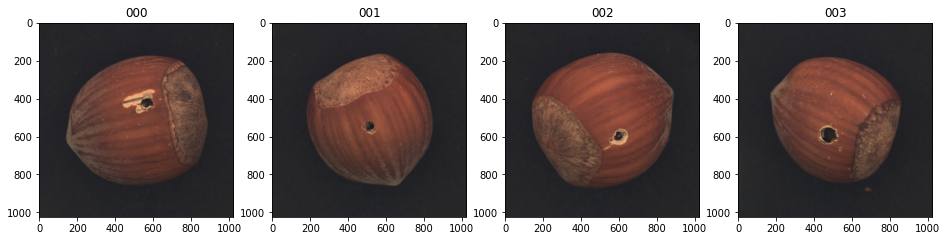

INFO:__main__:test print data...


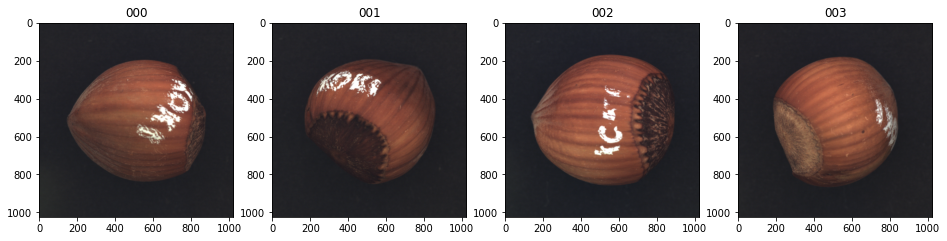

INFO:__main__:test crack data...


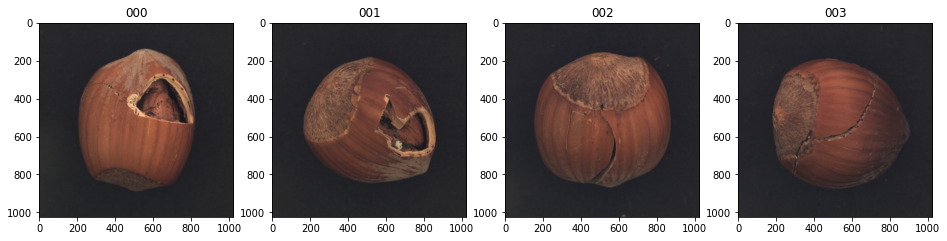

INFO:__main__:ground truth cut data...


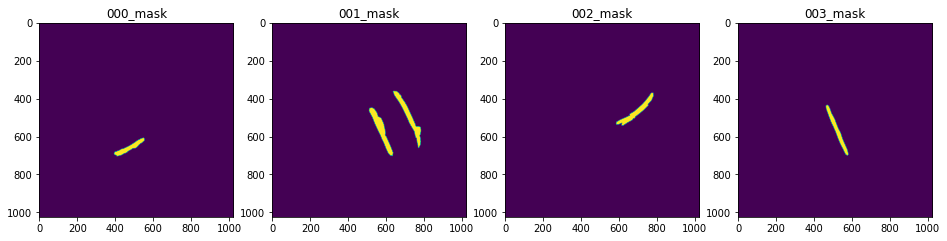

INFO:__main__:ground truth hole data...


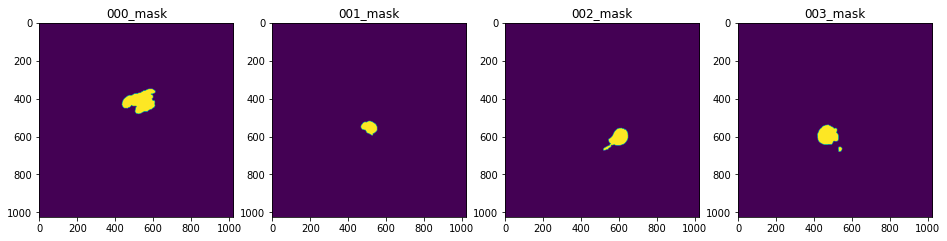

INFO:__main__:ground truth print data...


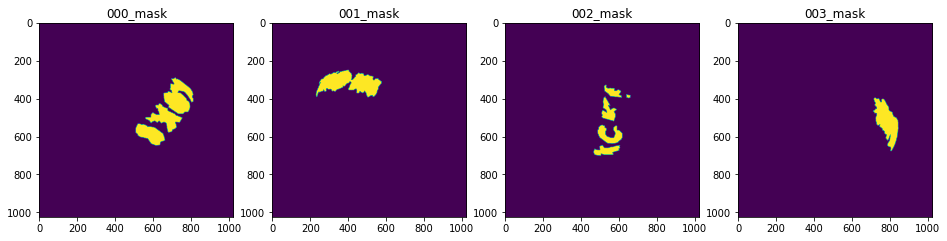

INFO:__main__:ground truth crack data...


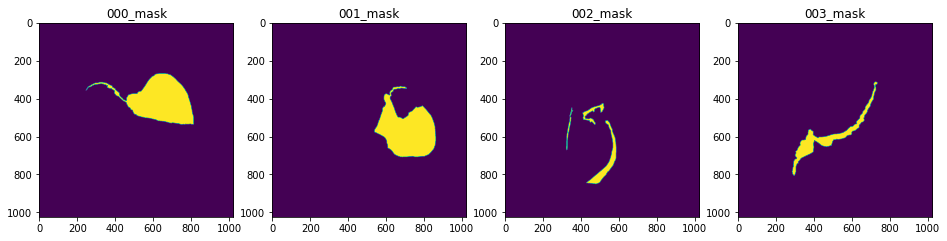

In [10]:
def show_group_images_() -> None:
    num_of_images = 4

    logger.info("train data...")
    show_images(TRAIN_DIR, num_of_images)

    for group in TEST_DIR.glob("*"):
        logger.info(f"test {group.stem} data...")
        show_images(group.resolve(), num_of_images)

    for group in GROUND_TRUTH_DIR.glob("*"):
        logger.info(f"ground truth {group.stem} data...")
        show_images(group.resolve(), num_of_images)


show_group_images_()
